In [2]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torchaudio
from torchaudio_augmentations import (
    RandomResizedCrop,
    RandomApply,
    PolarityInversion,
    Noise,
    Gain,
    HighLowPass,
    Delay,
    PitchShift,
    Reverb,
    Compose,
)
print(torch.__version__)
print(torchaudio.__version__)

from src import load_music as load

plt.rcParams['figure.figsize'] = (17, 5)

1.10.1+cu113
0.10.1+cu113


In [3]:
AUDIO_DIR = '/home/sga/data/gtzan/Data'
GTZAN_GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
class GTZANDataset(Dataset):
    def __init__(self, data_path, split, num_samples, is_augmentation):
        self.data_path =  data_path if data_path else ''
        self.split = split
        self.num_samples = num_samples
        self.is_augmentation = is_augmentation
        self.genres = GTZAN_GENRES
        self.song_list = self._get_song_list()
        if is_augmentation:
            self._get_augmentations()

    def _adjust_audio_length(self, wav):
        if self.split == 'training':
            random_index = random.randint(0, len(wav) - self.num_samples - 1)
            wav = wav[random_index : random_index + self.num_samples]
        else:
            hop = (len(wav) - self.num_samples) // self.num_chunks
            wav = np.array([wav[i * hop : i * hop + self.num_samples] for i in range(self.num_chunks)])
        return wav
    def _get_song_list(self):

        filtered_test = [
            "blues.00012",
            "blues.00013",
            "blues.00014",
            "blues.00015",
            "blues.00016",
            "blues.00017",
            "blues.00018",
            "blues.00019",
            "blues.00020",
            "blues.00021",
            "blues.00022",
            "blues.00023",
            "blues.00024",
            "blues.00025",
            "blues.00026",
            "blues.00027",
            "blues.00028",
            "blues.00061",
            "blues.00062",
            "blues.00063",
            "blues.00064",
            "blues.00065",
            "blues.00066",
            "blues.00067",
            "blues.00068",
            "blues.00069",
            "blues.00070",
            "blues.00071",
            "blues.00072",
            "blues.00098",
            "blues.00099",
            "classical.00011",
            "classical.00012",
            "classical.00013",
            "classical.00014",
            "classical.00015",
            "classical.00016",
            "classical.00017",
            "classical.00018",
            "classical.00019",
            "classical.00020",
            "classical.00021",
            "classical.00022",
            "classical.00023",
            "classical.00024",
            "classical.00025",
            "classical.00026",
            "classical.00027",
            "classical.00028",
            "classical.00029",
            "classical.00034",
            "classical.00035",
            "classical.00036",
            "classical.00037",
            "classical.00038",
            "classical.00039",
            "classical.00040",
            "classical.00041",
            "classical.00049",
            "classical.00077",
            "classical.00078",
            "classical.00079",
            "country.00030",
            "country.00031",
            "country.00032",
            "country.00033",
            "country.00034",
            "country.00035",
            "country.00036",
            "country.00037",
            "country.00038",
            "country.00039",
            "country.00040",
            "country.00043",
            "country.00044",
            "country.00046",
            "country.00047",
            "country.00048",
            "country.00050",
            "country.00051",
            "country.00053",
            "country.00054",
            "country.00055",
            "country.00056",
            "country.00057",
            "country.00058",
            "country.00059",
            "country.00060",
            "country.00061",
            "country.00062",
            "country.00063",
            "country.00064",
            "disco.00001",
            "disco.00021",
            "disco.00058",
            "disco.00062",
            "disco.00063",
            "disco.00064",
            "disco.00065",
            "disco.00066",
            "disco.00069",
            "disco.00076",
            "disco.00077",
            "disco.00078",
            "disco.00079",
            "disco.00080",
            "disco.00081",
            "disco.00082",
            "disco.00083",
            "disco.00084",
            "disco.00085",
            "disco.00086",
            "disco.00087",
            "disco.00088",
            "disco.00091",
            "disco.00092",
            "disco.00093",
            "disco.00094",
            "disco.00096",
            "disco.00097",
            "disco.00099",
            "hiphop.00000",
            "hiphop.00026",
            "hiphop.00027",
            "hiphop.00030",
            "hiphop.00040",
            "hiphop.00043",
            "hiphop.00044",
            "hiphop.00045",
            "hiphop.00051",
            "hiphop.00052",
            "hiphop.00053",
            "hiphop.00054",
            "hiphop.00062",
            "hiphop.00063",
            "hiphop.00064",
            "hiphop.00065",
            "hiphop.00066",
            "hiphop.00067",
            "hiphop.00068",
            "hiphop.00069",
            "hiphop.00070",
            "hiphop.00071",
            "hiphop.00072",
            "hiphop.00073",
            "hiphop.00074",
            "hiphop.00075",
            "hiphop.00099",
            "jazz.00073",
            "jazz.00074",
            "jazz.00075",
            "jazz.00076",
            "jazz.00077",
            "jazz.00078",
            "jazz.00079",
            "jazz.00080",
            "jazz.00081",
            "jazz.00082",
            "jazz.00083",
            "jazz.00084",
            "jazz.00085",
            "jazz.00086",
            "jazz.00087",
            "jazz.00088",
            "jazz.00089",
            "jazz.00090",
            "jazz.00091",
            "jazz.00092",
            "jazz.00093",
            "jazz.00094",
            "jazz.00095",
            "jazz.00096",
            "jazz.00097",
            "jazz.00098",
            "jazz.00099",
            "metal.00012",
            "metal.00013",
            "metal.00014",
            "metal.00015",
            "metal.00022",
            "metal.00023",
            "metal.00025",
            "metal.00026",
            "metal.00027",
            "metal.00028",
            "metal.00029",
            "metal.00030",
            "metal.00031",
            "metal.00032",
            "metal.00033",
            "metal.00038",
            "metal.00039",
            "metal.00067",
            "metal.00070",
            "metal.00073",
            "metal.00074",
            "metal.00075",
            "metal.00078",
            "metal.00083",
            "metal.00085",
            "metal.00087",
            "metal.00088",
            "pop.00000",
            "pop.00001",
            "pop.00013",
            "pop.00014",
            "pop.00043",
            "pop.00063",
            "pop.00064",
            "pop.00065",
            "pop.00066",
            "pop.00069",
            "pop.00070",
            "pop.00071",
            "pop.00072",
            "pop.00073",
            "pop.00074",
            "pop.00075",
            "pop.00076",
            "pop.00077",
            "pop.00078",
            "pop.00079",
            "pop.00082",
            "pop.00088",
            "pop.00089",
            "pop.00090",
            "pop.00091",
            "pop.00092",
            "pop.00093",
            "pop.00094",
            "pop.00095",
            "pop.00096",
            "reggae.00034",
            "reggae.00035",
            "reggae.00036",
            "reggae.00037",
            "reggae.00038",
            "reggae.00039",
            "reggae.00040",
            "reggae.00046",
            "reggae.00047",
            "reggae.00048",
            "reggae.00052",
            "reggae.00053",
            "reggae.00064",
            "reggae.00065",
            "reggae.00066",
            "reggae.00067",
            "reggae.00068",
            "reggae.00071",
            "reggae.00079",
            "reggae.00082",
            "reggae.00083",
            "reggae.00084",
            "reggae.00087",
            "reggae.00088",
            "reggae.00089",
            "reggae.00090",
            "rock.00010",
            "rock.00011",
            "rock.00012",
            "rock.00013",
            "rock.00014",
            "rock.00015",
            "rock.00027",
            "rock.00028",
            "rock.00029",
            "rock.00030",
            "rock.00031",
            "rock.00032",
            "rock.00033",
            "rock.00034",
            "rock.00035",
            "rock.00036",
            "rock.00037",
            "rock.00039",
            "rock.00040",
            "rock.00041",
            "rock.00042",
            "rock.00043",
            "rock.00044",
            "rock.00045",
            "rock.00046",
            "rock.00047",
            "rock.00048",
            "rock.00086",
            "rock.00087",
            "rock.00088",
            "rock.00089",
            "rock.00090",
        ]

        filtered_train = [
            "blues.00029",
            "blues.00030",
            "blues.00031",
            "blues.00032",
            "blues.00033",
            "blues.00034",
            "blues.00035",
            "blues.00036",
            "blues.00037",
            "blues.00038",
            "blues.00039",
            "blues.00040",
            "blues.00041",
            "blues.00042",
            "blues.00043",
            "blues.00044",
            "blues.00045",
            "blues.00046",
            "blues.00047",
            "blues.00048",
            "blues.00049",
            "blues.00073",
            "blues.00074",
            "blues.00075",
            "blues.00076",
            "blues.00077",
            "blues.00078",
            "blues.00079",
            "blues.00080",
            "blues.00081",
            "blues.00082",
            "blues.00083",
            "blues.00084",
            "blues.00085",
            "blues.00086",
            "blues.00087",
            "blues.00088",
            "blues.00089",
            "blues.00090",
            "blues.00091",
            "blues.00092",
            "blues.00093",
            "blues.00094",
            "blues.00095",
            "blues.00096",
            "blues.00097",
            "classical.00030",
            "classical.00031",
            "classical.00032",
            "classical.00033",
            "classical.00043",
            "classical.00044",
            "classical.00045",
            "classical.00046",
            "classical.00047",
            "classical.00048",
            "classical.00050",
            "classical.00051",
            "classical.00052",
            "classical.00053",
            "classical.00054",
            "classical.00055",
            "classical.00056",
            "classical.00057",
            "classical.00058",
            "classical.00059",
            "classical.00060",
            "classical.00061",
            "classical.00062",
            "classical.00063",
            "classical.00064",
            "classical.00065",
            "classical.00066",
            "classical.00067",
            "classical.00080",
            "classical.00081",
            "classical.00082",
            "classical.00083",
            "classical.00084",
            "classical.00085",
            "classical.00086",
            "classical.00087",
            "classical.00088",
            "classical.00089",
            "classical.00090",
            "classical.00091",
            "classical.00092",
            "classical.00093",
            "classical.00094",
            "classical.00095",
            "classical.00096",
            "classical.00097",
            "classical.00098",
            "classical.00099",
            "country.00019",
            "country.00020",
            "country.00021",
            "country.00022",
            "country.00023",
            "country.00024",
            "country.00025",
            "country.00026",
            "country.00028",
            "country.00029",
            "country.00065",
            "country.00066",
            "country.00067",
            "country.00068",
            "country.00069",
            "country.00070",
            "country.00071",
            "country.00072",
            "country.00073",
            "country.00074",
            "country.00075",
            "country.00076",
            "country.00077",
            "country.00078",
            "country.00079",
            "country.00080",
            "country.00081",
            "country.00082",
            "country.00083",
            "country.00084",
            "country.00085",
            "country.00086",
            "country.00087",
            "country.00088",
            "country.00089",
            "country.00090",
            "country.00091",
            "country.00092",
            "country.00093",
            "country.00094",
            "country.00095",
            "country.00096",
            "country.00097",
            "country.00098",
            "country.00099",
            "disco.00005",
            "disco.00015",
            "disco.00016",
            "disco.00017",
            "disco.00018",
            "disco.00019",
            "disco.00020",
            "disco.00022",
            "disco.00023",
            "disco.00024",
            "disco.00025",
            "disco.00026",
            "disco.00027",
            "disco.00028",
            "disco.00029",
            "disco.00030",
            "disco.00031",
            "disco.00032",
            "disco.00033",
            "disco.00034",
            "disco.00035",
            "disco.00036",
            "disco.00037",
            "disco.00039",
            "disco.00040",
            "disco.00041",
            "disco.00042",
            "disco.00043",
            "disco.00044",
            "disco.00045",
            "disco.00047",
            "disco.00049",
            "disco.00053",
            "disco.00054",
            "disco.00056",
            "disco.00057",
            "disco.00059",
            "disco.00061",
            "disco.00070",
            "disco.00073",
            "disco.00074",
            "disco.00089",
            "hiphop.00002",
            "hiphop.00003",
            "hiphop.00004",
            "hiphop.00005",
            "hiphop.00006",
            "hiphop.00007",
            "hiphop.00008",
            "hiphop.00009",
            "hiphop.00010",
            "hiphop.00011",
            "hiphop.00012",
            "hiphop.00013",
            "hiphop.00014",
            "hiphop.00015",
            "hiphop.00016",
            "hiphop.00017",
            "hiphop.00018",
            "hiphop.00019",
            "hiphop.00020",
            "hiphop.00021",
            "hiphop.00022",
            "hiphop.00023",
            "hiphop.00024",
            "hiphop.00025",
            "hiphop.00028",
            "hiphop.00029",
            "hiphop.00031",
            "hiphop.00032",
            "hiphop.00033",
            "hiphop.00034",
            "hiphop.00035",
            "hiphop.00036",
            "hiphop.00037",
            "hiphop.00038",
            "hiphop.00041",
            "hiphop.00042",
            "hiphop.00055",
            "hiphop.00056",
            "hiphop.00057",
            "hiphop.00058",
            "hiphop.00059",
            "hiphop.00060",
            "hiphop.00061",
            "hiphop.00077",
            "hiphop.00078",
            "hiphop.00079",
            "hiphop.00080",
            "jazz.00000",
            "jazz.00001",
            "jazz.00011",
            "jazz.00012",
            "jazz.00013",
            "jazz.00014",
            "jazz.00015",
            "jazz.00016",
            "jazz.00017",
            "jazz.00018",
            "jazz.00019",
            "jazz.00020",
            "jazz.00021",
            "jazz.00022",
            "jazz.00023",
            "jazz.00024",
            "jazz.00041",
            "jazz.00047",
            "jazz.00048",
            "jazz.00049",
            "jazz.00050",
            "jazz.00051",
            "jazz.00052",
            "jazz.00053",
            #"jazz.00054", damaged
            "jazz.00055",
            "jazz.00056",
            "jazz.00057",
            "jazz.00058",
            "jazz.00059",
            "jazz.00060",
            "jazz.00061",
            "jazz.00062",
            "jazz.00063",
            "jazz.00064",
            "jazz.00065",
            "jazz.00066",
            "jazz.00067",
            "jazz.00068",
            "jazz.00069",
            "jazz.00070",
            "jazz.00071",
            "jazz.00072",
            "metal.00002",
            "metal.00003",
            "metal.00005",
            "metal.00021",
            "metal.00024",
            "metal.00035",
            "metal.00046",
            "metal.00047",
            "metal.00048",
            "metal.00049",
            "metal.00050",
            "metal.00051",
            "metal.00052",
            "metal.00053",
            "metal.00054",
            "metal.00055",
            "metal.00056",
            "metal.00057",
            "metal.00059",
            "metal.00060",
            "metal.00061",
            "metal.00062",
            "metal.00063",
            "metal.00064",
            "metal.00065",
            "metal.00066",
            "metal.00069",
            "metal.00071",
            "metal.00072",
            "metal.00079",
            "metal.00080",
            "metal.00084",
            "metal.00086",
            "metal.00089",
            "metal.00090",
            "metal.00091",
            "metal.00092",
            "metal.00093",
            "metal.00094",
            "metal.00095",
            "metal.00096",
            "metal.00097",
            "metal.00098",
            "metal.00099",
            "pop.00002",
            "pop.00003",
            "pop.00004",
            "pop.00005",
            "pop.00006",
            "pop.00007",
            "pop.00008",
            "pop.00009",
            "pop.00011",
            "pop.00012",
            "pop.00016",
            "pop.00017",
            "pop.00018",
            "pop.00019",
            "pop.00020",
            "pop.00023",
            "pop.00024",
            "pop.00025",
            "pop.00026",
            "pop.00027",
            "pop.00028",
            "pop.00029",
            "pop.00031",
            "pop.00032",
            "pop.00033",
            "pop.00034",
            "pop.00035",
            "pop.00036",
            "pop.00038",
            "pop.00039",
            "pop.00040",
            "pop.00041",
            "pop.00042",
            "pop.00044",
            "pop.00046",
            "pop.00049",
            "pop.00050",
            "pop.00080",
            "pop.00097",
            "pop.00098",
            "pop.00099",
            "reggae.00000",
            "reggae.00001",
            "reggae.00002",
            "reggae.00004",
            "reggae.00006",
            "reggae.00009",
            "reggae.00011",
            "reggae.00012",
            "reggae.00014",
            "reggae.00015",
            "reggae.00016",
            "reggae.00017",
            "reggae.00018",
            "reggae.00019",
            "reggae.00020",
            "reggae.00021",
            "reggae.00022",
            "reggae.00023",
            "reggae.00024",
            "reggae.00025",
            "reggae.00026",
            "reggae.00027",
            "reggae.00028",
            "reggae.00029",
            "reggae.00030",
            "reggae.00031",
            "reggae.00032",
            "reggae.00042",
            "reggae.00043",
            "reggae.00044",
            "reggae.00045",
            "reggae.00049",
            "reggae.00050",
            "reggae.00051",
            "reggae.00054",
            "reggae.00055",
            "reggae.00056",
            "reggae.00057",
            "reggae.00058",
            "reggae.00059",
            "reggae.00060",
            "reggae.00063",
            "reggae.00069",
            "rock.00000",
            "rock.00001",
            "rock.00002",
            "rock.00003",
            "rock.00004",
            "rock.00005",
            "rock.00006",
            "rock.00007",
            "rock.00008",
            "rock.00009",
            "rock.00016",
            "rock.00017",
            "rock.00018",
            "rock.00019",
            "rock.00020",
            "rock.00021",
            "rock.00022",
            "rock.00023",
            "rock.00024",
            "rock.00025",
            "rock.00026",
            "rock.00057",
            "rock.00058",
            "rock.00059",
            "rock.00060",
            "rock.00061",
            "rock.00062",
            "rock.00063",
            "rock.00064",
            "rock.00065",
            "rock.00066",
            "rock.00067",
            "rock.00068",
            "rock.00069",
            "rock.00070",
            "rock.00091",
            "rock.00092",
            "rock.00093",
            "rock.00094",
            "rock.00095",
            "rock.00096",
            "rock.00097",
            "rock.00098",
            "rock.00099",
        ]

        filtered_valid = [
            "blues.00000",
            "blues.00001",
            "blues.00002",
            "blues.00003",
            "blues.00004",
            "blues.00005",
            "blues.00006",
            "blues.00007",
            "blues.00008",
            "blues.00009",
            "blues.00010",
            "blues.00011",
            "blues.00050",
            "blues.00051",
            "blues.00052",
            "blues.00053",
            "blues.00054",
            "blues.00055",
            "blues.00056",
            "blues.00057",
            "blues.00058",
            "blues.00059",
            "blues.00060",
            "classical.00000",
            "classical.00001",
            "classical.00002",
            "classical.00003",
            "classical.00004",
            "classical.00005",
            "classical.00006",
            "classical.00007",
            "classical.00008",
            "classical.00009",
            "classical.00010",
            "classical.00068",
            "classical.00069",
            "classical.00070",
            "classical.00071",
            "classical.00072",
            "classical.00073",
            "classical.00074",
            "classical.00075",
            "classical.00076",
            "country.00000",
            "country.00001",
            "country.00002",
            "country.00003",
            "country.00004",
            "country.00005",
            "country.00006",
            "country.00007",
            "country.00009",
            "country.00010",
            "country.00011",
            "country.00012",
            "country.00013",
            "country.00014",
            "country.00015",
            "country.00016",
            "country.00017",
            "country.00018",
            "country.00027",
            "country.00041",
            "country.00042",
            "country.00045",
            "country.00049",
            "disco.00000",
            "disco.00002",
            "disco.00003",
            "disco.00004",
            "disco.00006",
            "disco.00007",
            "disco.00008",
            "disco.00009",
            "disco.00010",
            "disco.00011",
            "disco.00012",
            "disco.00013",
            "disco.00014",
            "disco.00046",
            "disco.00048",
            "disco.00052",
            "disco.00067",
            "disco.00068",
            "disco.00072",
            "disco.00075",
            "disco.00090",
            "disco.00095",
            "hiphop.00081",
            "hiphop.00082",
            "hiphop.00083",
            "hiphop.00084",
            "hiphop.00085",
            "hiphop.00086",
            "hiphop.00087",
            "hiphop.00088",
            "hiphop.00089",
            "hiphop.00090",
            "hiphop.00091",
            "hiphop.00092",
            "hiphop.00093",
            "hiphop.00094",
            "hiphop.00095",
            "hiphop.00096",
            "hiphop.00097",
            "hiphop.00098",
            "jazz.00002",
            "jazz.00003",
            "jazz.00004",
            "jazz.00005",
            "jazz.00006",
            "jazz.00007",
            "jazz.00008",
            "jazz.00009",
            "jazz.00010",
            "jazz.00025",
            "jazz.00026",
            "jazz.00027",
            "jazz.00028",
            "jazz.00029",
            "jazz.00030",
            "jazz.00031",
            "jazz.00032",
            "metal.00000",
            "metal.00001",
            "metal.00006",
            "metal.00007",
            "metal.00008",
            "metal.00009",
            "metal.00010",
            "metal.00011",
            "metal.00016",
            "metal.00017",
            "metal.00018",
            "metal.00019",
            "metal.00020",
            "metal.00036",
            "metal.00037",
            "metal.00068",
            "metal.00076",
            "metal.00077",
            "metal.00081",
            "metal.00082",
            "pop.00010",
            "pop.00053",
            "pop.00055",
            "pop.00058",
            "pop.00059",
            "pop.00060",
            "pop.00061",
            "pop.00062",
            "pop.00081",
            "pop.00083",
            "pop.00084",
            "pop.00085",
            "pop.00086",
            "reggae.00061",
            "reggae.00062",
            "reggae.00070",
            "reggae.00072",
            "reggae.00074",
            "reggae.00076",
            "reggae.00077",
            "reggae.00078",
            "reggae.00085",
            "reggae.00092",
            "reggae.00093",
            "reggae.00094",
            "reggae.00095",
            "reggae.00096",
            "reggae.00097",
            "reggae.00098",
            "reggae.00099",
            "rock.00038",
            "rock.00049",
            "rock.00050",
            "rock.00051",
            "rock.00052",
            "rock.00053",
            "rock.00054",
            "rock.00055",
            "rock.00056",
            "rock.00071",
            "rock.00072",
            "rock.00073",
            "rock.00074",
            "rock.00075",
            "rock.00076",
            "rock.00077",
            "rock.00078",
            "rock.00079",
            "rock.00080",
            "rock.00081",
            "rock.00082",
            "rock.00083",
            "rock.00084",
            "rock.00085",
        ]

        if self.split == "training":
            return filtered_train
        elif self.split == "testing":
            return filtered_test
        elif self.split == "validation":
            return filtered_valid

    def _get_augmentations(self):
        transforms = [
            RandomResizedCrop(n_samples=self.num_samples),
            RandomApply([PolarityInversion()], p=0.8),
            RandomApply([Noise(min_snr=0.3, max_snr=0.5)], p=0.3),
            RandomApply([Gain()], p=0.2),
            RandomApply([HighLowPass(sample_rate=22050)], p=0.8),
            RandomApply([Delay(sample_rate=22050)], p=0.5),
            RandomApply([PitchShift(n_samples=self.num_samples, sample_rate=22050)], p=0.4),
            RandomApply([Reverb(sample_rate=22050)], p=0.3),
        ]
        self.augmentation = Compose(transforms=transforms)

    def __getitem__(self, index):
        line = self.song_list[index]

        # get genre
        genre_name = line.split('.')[0]
        genre_index = self.genres.index(genre_name)

        # get audio
        audio_filename = os.path.join(self.data_path, 'genres',genre_name, (line + '.wav'))
        wav, fs = torchaudio.load(audio_filename, num_frames=self.num_samples, normalize=True)
        #wav = self._adjust_audio_length(wav).astype('float32')

        # data augmentation
        if self.is_augmentation:
            wav = self.augmentation(wav).squeeze(0)

        return wav, genre_index

    def __len__(self):
        return len(self.song_list)


In [22]:
train_dataloader = DataLoader(dataset=GTZANDataset(data_path=AUDIO_DIR, split="training", num_samples=22050 * 29, is_augmentation=False), batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
val_dataloader = DataLoader(dataset=GTZANDataset(data_path=AUDIO_DIR, split="validation", num_samples=22050 * 29, is_augmentation=False), batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
test_dataloader = DataLoader(dataset=GTZANDataset(data_path=AUDIO_DIR, split="testing", num_samples=22050 * 29, is_augmentation=False), batch_size=16, shuffle=True, num_workers=2, pin_memory=True)

In [23]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
train_wv = train_features[0].squeeze()
train_lbl = train_labels[0]

Feature batch shape: torch.Size([16, 1, 639450])
Labels batch shape: torch.Size([16])


In [7]:
class TempConv(nn.Module):
    def __init__(self, input_channels, output_channels, shape=4, padding=2, pooling=4, dropout=0.1):
        super(TempConv, self).__init__()
        self.conv = nn.Conv1d(input_channels, output_channels, shape, padding=padding, bias=False)
        self.bn = nn.BatchNorm1d(output_channels)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(pooling)
        self.dropout = nn.Dropout(dropout)

    def forward(self, wav):
        out = self.conv(wav)
        out = self.bn(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.dropout(out)
        return out

In [8]:
class Gramophone(nn.Module):
    def __init__(self, num_channels=256,
                 sample_rate=22050,
                 n_fft=2048,
                 f_min=0.0,
                 f_max=11025.0,
                 num_mels=128,
                 num_classes=10):
        super(Gramophone, self).__init__()

        # mel spectrogram
        self.melspec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                            n_fft=n_fft,
                                                            f_min=f_min,
                                                            f_max=f_max,
                                                            n_mels=num_mels)
        self.amplitude_to_db = torchaudio.transforms.AmplitudeToDB()
        self.input_bn = nn.BatchNorm1d(128)

        # convolutional layers
        self.layer1 = TempConv(128, num_channels, pooling=4)
        self.layer2 = TempConv(num_channels, num_channels, pooling=2)
        self.layer3 = TempConv(num_channels, num_channels * 2, pooling=2)
        self.layer4 = TempConv(num_channels * 2, num_channels * 2, pooling=2)
        self.ap = nn.AdaptiveMaxPool1d(1)

        # dense layers
        self.dense1 = nn.Linear(num_channels * 2, num_channels * 8)
        self.dense_bn = nn.BatchNorm1d(num_channels * 8)
        self.dense2 = nn.Linear(num_channels * 8, num_channels * 8)
        self.dense2_bn = nn.BatchNorm1d(num_channels * 8)
        self.dense3 = nn.Linear(num_channels * 8, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, wav):
        # input Preprocessing
        #print(wav.device)
        out = self.melspec(wav)
        out = self.amplitude_to_db(out)

        # input batch normalization
        out = out.squeeze()
        #print(out.shape)
        out = self.input_bn(out)

        # convolutional layers
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        #print(out.shape)
        out = self.ap(out)
        #print(out.shape)

        # reshape. (batch_size, num_channels, 1, 1) -> (batch_size, num_channels)
        out = out.reshape(len(out), -1)

        # dense layers
        out = self.dense1(out)
        out = self.dense_bn(out)
        out = self.relu(out)
        out = self.dense2(out)
        out = self.dense2_bn(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.dense3(out)

        return out

In [40]:
cnn = Gramophone().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
num_epochs = 100
patience = 20

In [10]:
# import EarlyStopping
from pytorchtools import EarlyStopping
def train_model(model,patience, n_epochs):

    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = []

    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        # current_batch = batch
        for batch, (data, target) in enumerate(train_dataloader, 1):
            # datas, targets = [], []
            #if batch != prev_batch:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            data = data.to(device)
            target = target.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = loss_function(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in val_dataloader:
            data = data.to(device)
            target = target.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = loss_function(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        epoch_len = len(str(n_epochs))

        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')

        print(print_msg)

        # clear lists to track next epoch
        train_losses = []
        valid_losses = []

        # early_stopping needs the validation loss to check if it has decresed,
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [41]:
vet_model, train_loss, valid_loss = train_model(cnn,patience, num_epochs)

[  1/100] train_loss: 1.89543 valid_loss: 2.28013
Validation loss decreased (inf --> 2.280134).  Saving model ...
[  2/100] train_loss: 1.52322 valid_loss: 2.20780
Validation loss decreased (2.280134 --> 2.207798).  Saving model ...
[  3/100] train_loss: 1.47040 valid_loss: 2.53308
EarlyStopping counter: 1 out of 20
[  4/100] train_loss: 1.29639 valid_loss: 1.99715
Validation loss decreased (2.207798 --> 1.997154).  Saving model ...
[  5/100] train_loss: 1.22619 valid_loss: 2.10091
EarlyStopping counter: 1 out of 20
[  6/100] train_loss: 1.10754 valid_loss: 2.10094
EarlyStopping counter: 2 out of 20
[  7/100] train_loss: 1.02589 valid_loss: 2.99958
EarlyStopping counter: 3 out of 20
[  8/100] train_loss: 1.08103 valid_loss: 2.41442
EarlyStopping counter: 4 out of 20
[  9/100] train_loss: 0.94627 valid_loss: 2.31421
EarlyStopping counter: 5 out of 20
[ 10/100] train_loss: 0.91148 valid_loss: 3.62116
EarlyStopping counter: 6 out of 20
[ 11/100] train_loss: 1.02964 valid_loss: 2.66181
Ear

In [48]:
torch.save(vet_model.state_dict(), 'gtzan_model.pt')

In [42]:
# Load the best model
S = torch.load('checkpoint.pt')
loaded_model = Gramophone().to(device)
loaded_model.load_state_dict(S)
#S = model #torch.load('checkpoint')
#model.load_state_dict(S)
print('loaded!')

# Run evaluation
loaded_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for wav, genre_index in test_dataloader:
        wav = wav.to(device)
        genre_index = genre_index.to(device)

        # reshape and aggregate chunk-level predictions
        _, c, t = wav.size()
        logits = loaded_model(wav)
        _, pred = torch.max(logits.data, 1)

        # append labels and predictions
        y_true.extend(genre_index.tolist())
        y_pred.extend(pred.tolist())

loaded!


Accuracy: 0.3000


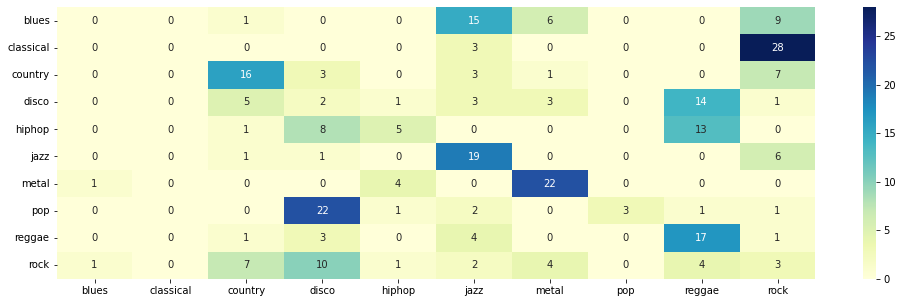

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, xticklabels=GTZAN_GENRES, yticklabels=GTZAN_GENRES, cmap='YlGnBu')
print('Accuracy: %.4f' % accuracy)